# Simple Examples for Using IGMspec (v1.1.1)

In [1]:
%matplotlib inline

In [2]:
# import
from astropy import units as u

from igmspec import query_catalog as iqcat
from igmspec import interface_db as igidb
from igmspec import db_utils as idbu
from igmspec.igmspec import IgmSpec

from pyigm.surveys.llssurvey import LLSSurvey

## Setup Class

In [3]:
igmsp = IgmSpec()

Using /raid/IGMSPEC_DB/IGMspec_DB_v01.hdf5 for the catalog file
Using /raid/IGMSPEC_DB/IGMspec_DB_v01.hdf5 for the DB file
Available surveys: [u'GGG', u'HD-LLS_DR1', u'KODIAQ_DR1', u'SDSS_DR7']


In [4]:
igmsp.qcat

<QueryCatalog:  DB_file=/raid/IGMSPEC_DB/IGMspec_DB_v01.hdf5 with 377018 sources
   Loaded surveys are [u'BOSS_DR12', u'GGG', u'HD-LLS_DR1', u'KODIAQ_DR1', u'SDSS_DR7'] 
>

In [5]:
igmsp.idb

<InterfaceDB:  DB_file=/raid/IGMSPEC_DB/IGMspec_DB_v01.hdf5 
   Loaded surveys are [u'GGG', u'HD-LLS_DR1', u'KODIAQ_DR1', u'SDSS_DR7'] 
>

## Radial search

### Search around FJ0812+32

In [6]:
ids0812 = igmsp.radial_search(('08:12:40.68','+32:08:09'), 1.*u.arcsec)
igmsp.show_cat(ids0812)

Your search yielded 1 match[es]
IGM_ID    RA      DEC     zem   flag_survey sig_zem  flag_zem
------ -------- -------- ------ ----------- ------- ---------
 50734 123.1695  32.1357  2.698           7   0.000 BOSS_PCA 
----------
Survey key:
    BOSS_DR12: 1
    GGG: 16
    HD-LLS_DR1: 8
    KODIAQ_DR1: 4
    SDSS_DR7: 2


In [7]:
# Grab meta
meta0812 = igmsp.grab_meta('SDSS_DR7', ids0812, show=True)

In [8]:
meta0812

zem,sig_zem,Z_CONF,Z_WARN,PLATE,MJD,FIBERID,FLG_TARG,RA,DEC,PSF_U,PSF_G,PSF_R,PSF_I,PSF_Z,PSF_SU,PSF_SG,PSF_SR,PSF_SI,PSF_SZ,DATE-OBS,EPOCH,R,IGM_ID,SPEC_FILE,NPIX,WV_MIN,WV_MAX,SURVEY_ID,INSTR,GRATING,TELESCOPE
float32,float32,float32,int16,int32,int32,int32,int16,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,str10,float64,float64,int64,str28,int64,float64,float64,int64,str4,str4,str10
2.704,0.0015619,0.0,0,861,52318,333,0,123.170,32.136,19.6334,17.8486,17.4545,17.2825,17.139,0.02811,0.017889,0.021285,0.018897,0.028298,2002-02-13,2000.0,2000.0,50734,spSpec-52318-0861-333.fit.gz,3821,3823.8,9215.1,9317,SDSS,BOTH,SDSS 2.5-M


In [9]:
# Grab spectra
J0812spec, meta = igmsp.grab_spec('KODIAQ_DR1', ids0812)

Staged 1 spectra totalling 0.0032 Gb
Loaded spectra


/Users/xavier/local/Python/linetools/linetools/spectra/xspectrum1d.py:291: UserWarning: Assuming wavelength unit is Angstroms
  warnings.warn("Assuming wavelength unit is Angstroms")


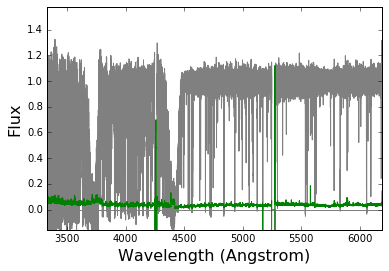

In [10]:
J0812spec.plot()

### Search around J233446.40-090812.3

In [11]:
ids2334 = igmsp.radial_search('J233446.40-090812.3', 1.*u.arcsec)
igmsp.show_cat(ids2334)

Your search yielded 1 match[es]
IGM_ID    RA      DEC     zem   flag_survey sig_zem flag_zem
------ -------- -------- ------ ----------- ------- --------
376530 353.6934  -9.1368  3.317          14   0.001     SDSS
----------
Survey key:
    BOSS_DR12: 1
    GGG: 16
    HD-LLS_DR1: 8
    KODIAQ_DR1: 4
    SDSS_DR7: 2


In [12]:
# Grab meta
meta2334 = igmsp.grab_meta('HD-LLS_DR1', ids2334, show=True)

In [13]:
meta2334

Name,QSO,RA,DEC,zem,Z_LLS,logNHI,sig(logNHI) [2],SPEC_FILE,IGM_ID,EPOCH,NPIX,DATE-OBS,WV_MIN,WV_MAX,R,SURVEY_ID,GRATING,INSTR,TELESCOPE
str33,str19,float64,float64,float64,float64,float64,float64,str37,int64,float64,int64,str10,float64,float64,float64,int64,str4,str5,str13
HD-LLS_J233446.40-090812.3_z3.226,SDSSJ2334-0908,353.693,-9.137,3.317,3.226,17.7,0.1 .. 0.3,HD-LLS_J233446.40-090812.3_ESI.fits,376530,2000.0,33000,2002-12-02,3899.8,11714.9,6000.0,139,ECH,ESI,Keck-II
HD-LLS_J233446.40-090812.3_z3.226,SDSSJ2334-0908,353.693,-9.137,3.317,3.226,17.7,0.1 .. 0.3,HD-LLS_J233446.40-090812.3_HIRES.fits,376530,2000.0,129277,2007-09-18,4064.6,7120.0,48000.0,140,BOTH,HIRES,Keck-I
HD-LLS_J233446.40-090812.3_z3.226,SDSSJ2334-0908,353.693,-9.137,3.317,3.226,17.7,0.1 .. 0.3,HD-LLS_J233446.40-090812.3_MAGE.fits,376530,2000.0,16580,2010-08-13,3042.1,10269.6,5857.14285714,141,N/A,MagE,Magellan/Clay


In [14]:
# Grab spectra
J2334spec, meta_2334 = igmsp.grab_spec('HD-LLS_DR1', ids2334)

Staged 3 spectra totalling 0.01008 Gb
Loaded spectra


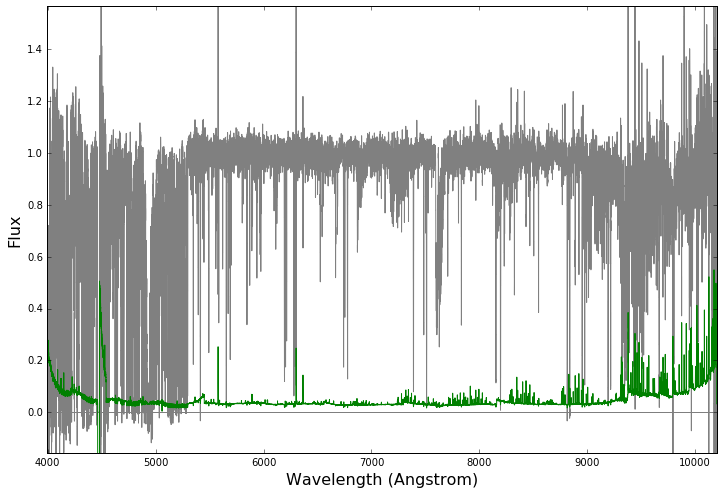

In [15]:
# Plot the first one (ESI)
J2334spec.plot(inline=True)

----

## Simple catalog search

### LLS from SDSS_DR7 vs. IGMspec

In [16]:
sdss_dr7_all = LLSSurvey.load_SDSS_DR7(sample='all')
sdss_dr7_all

SDSS-DR7: Loading LLS file /Users/xavier/local/Python/pyigm/pyigm/data/LLS/SDSS/lls_dr7_stat_LLS.fits.gz
SDSS-DR7: Loading QSOs file /Users/xavier/local/Python/pyigm/pyigm/data/LLS/SDSS/lls_dr7_qsos_sn2050.fits.gz


<IGMSurvey: nsys=1935, type=LLS, ref=SDSS-DR7, nsightlines=3759>

In [17]:
# Grab the coord
lls_coord = sdss_dr7_all.coord
lls_coord

<SkyCoord (ICRS): (ra, dec) in deg
    [(339.61320833, 13.90905556), (160.36441667, 2.65569444),
     (167.247, 3.19108333), ..., (230.02470833, 23.66472222),
     (124.528625, 7.32227778), (150.86345833, 22.97005556)]>

In [18]:
# Match
lls_ids = igmsp.match_coord(lls_coord)

Your search yielded 1779 matches


In [19]:
# Show cat
igmsp.show_cat(lls_ids)

IGM_ID    RA      DEC     zem   flag_survey sig_zem  flag_zem
------ -------- -------- ------ ----------- ------- ---------
   881   0.7514  16.0077  3.662           3   0.002 BOSS_PCA 
   897   0.7640 -10.8641  3.638           3   0.001 BOSS_PCA 
  1680   1.4016  13.9971  3.709           3   0.002 BOSS_PCA 
  2168   1.8785  16.1257  3.519           3   0.002 BOSS_PCA 
  3248   2.8135  14.7672  4.986          19   0.003 BOSS_PCA 
  5192   4.5579  14.4155  4.216           3   0.001 BOSS_PCA 
  5225   4.5863  14.3143  3.938           3   0.004 BOSS_PCA 
  5482   4.8268  15.1032  4.145           3   0.003 BOSS_PCA 
  5617   4.9586  -0.6780  4.319           3   0.010 BOSS_PCA 
  5987   5.3335  15.8571  3.690           3   0.001 BOSS_PCA 
   ...      ...      ...    ...         ...     ...       ...
374730 326.8571  -8.6430  4.588          18   0.001      SDSS
374927 329.9334  -8.2762  3.755           2   0.001      SDSS
375013 331.0089  -8.8288  4.448           2   0.001      SDSS
375511 3

In [20]:
# Grab GGG spec
LLSspec, LLSmeta = igmsp.grab_spec('GGG', lls_ids)

Staged 172 spectra totalling 0.0044032 Gb
Loaded spectra


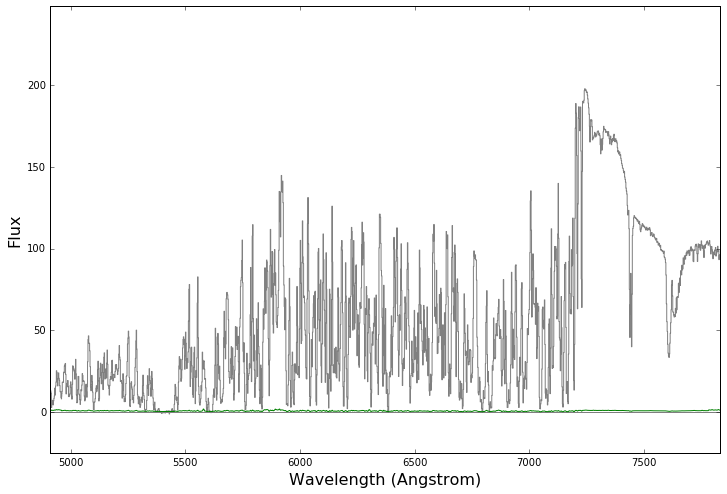

In [21]:
# Show the first spectrum
LLSspec.plot(inline=True)

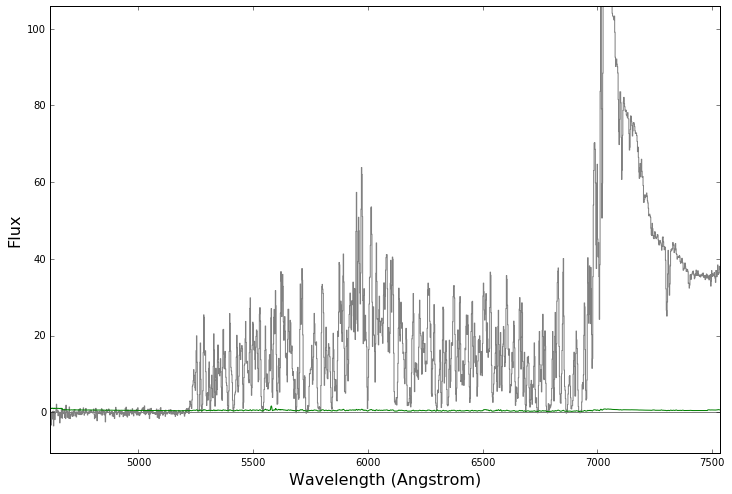

In [22]:
# Show the 10th spectrum
LLSspec.select=9
LLSspec.plot(inline=True)

----

## Time Evolution

In [23]:
ggg_kodiaq = igmsp.cat['flag_survey'] == 18

In [24]:
ids_time = igmsp.cat['IGM_ID'][ggg_kodiaq]
igmsp.show_cat(ids_time)

IGM_ID    RA      DEC     zem   flag_survey sig_zem flag_zem
------ -------- -------- ------ ----------- ------- --------
298834  21.2893 -10.7169  4.492          18   0.001     SDSS
300926  52.8319  -7.6953  4.738          18   0.001     SDSS
301049  54.6221   0.3656  5.032          18   0.001     SDSS
331478 170.7229   0.8916  4.551          18   0.001     SDSS
332948 173.1938  12.1505  5.167          18   0.002     SDSS
349924 205.1677  28.2245  5.338          18   0.001     SDSS
350040 205.4228  46.1862  5.023          18   0.001     SDSS
355109 215.4375  35.2210  4.549          18   0.001     SDSS
358845 222.7831   2.9377  4.481          18   0.001     SDSS
366519 238.1793  25.8748  4.666          18   0.000     SDSS
368827 243.6047  46.6747  5.313          18   0.001     SDSS
368866 243.6960  20.9842  5.091          18   0.001     SDSS
369021 244.0921   5.0244  4.872          18   0.001     SDSS
373638 264.4370  58.4749  4.941          18   0.001     SDSS
373960 314.3506  -0.5052

In [25]:
meta = igmsp.grab_meta(['GGG','KODIAQ_DR1'], ids_time)

In [26]:
spec_time, meta_time = igmsp.grab_spec(['GGG','SDSS_DR7'], ids_time)

Staged 34 spectra totalling 0.0008704 Gb
Loaded spectra
Staged 17 spectra totalling 0.001088 Gb
Loaded spectra


In [27]:
spec_time

[<XSpectrum1D: file=none, nspec=34, select=0, wvmin=4335.6 Angstrom, wvmax=7242.52 Angstrom>,
 <XSpectrum1D: file=none, nspec=17, select=0, wvmin=3800.14 Angstrom, wvmax=9206.62 Angstrom>]

### Plot both

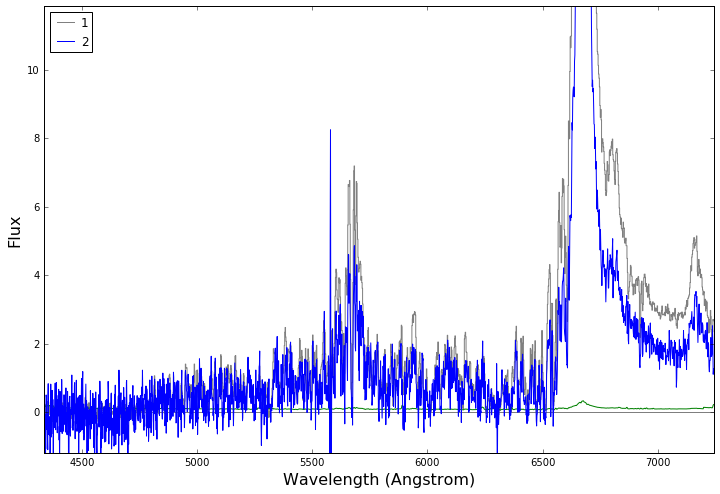

In [28]:
spec_time[0].plot(plot_two=spec_time[1],inline=True, scale_two=0.6)

----

## Pairs

### QPQ8 like

#### Query on separation (angular and redshift)

In [29]:
ID_fg, ID_bg = igmsp.pairs(30*u.arcsec, 3000.*u.km/u.s)

In [30]:
igmsp.show_cat(ID_fg)

IGM_ID    RA      DEC     zem   flag_survey sig_zem  flag_zem
------ -------- -------- ------ ----------- ------- ---------
   293   0.2461  28.3758  0.985           1  -1.000 BOSS_PCA 
   434   0.3669   8.6782  2.794           1   0.003 BOSS_PCA 
   851   0.7280  21.6517  1.877           1  -1.000 BOSS_PCA 
  1006   0.8555  13.4381  0.628           1  -1.000 BOSS_PCA 
  1638   1.3680  25.7650  2.545           1  -1.000 BOSS_PCA 
  2491   2.1692  17.1640  1.380           1  -1.000 BOSS_PCA 
  2749   2.3791  17.4591  0.665           1  -1.000 BOSS_PCA 
  2831   2.4458  12.0703  2.254           1   0.002 BOSS_PCA 
  2873   2.4857  26.2747  1.997           1   0.001 BOSS_PCA 
  2941   2.5424  32.9975  2.043           1  -1.000 BOSS_PCA 
   ...      ...      ...    ...         ...     ...       ...
374776 327.5874   0.9728  1.011           2   0.001      SDSS
374886 329.2297  -0.0669  1.657           2   0.014      SDSS
374986 330.7025  12.6126  2.073           2   0.002      SDSS
375051 3

#### Check for high dispersion spectrum in b/g QSOs

In [31]:
highdisp = igmsp.cutid_on_surveys(['HD-LLS_DR1', 'KODIAQ_DR1'], ID_bg)

In [32]:
igmsp.show_cat(ID_bg[highdisp])

IGM_ID    RA      DEC     zem   flag_survey sig_zem flag_zem
------ -------- -------- ------ ----------- ------- --------
376957  36.4785   0.9144  2.975           4   0.000   SIMBAD
----------
Survey key:
    BOSS_DR12: 1
    GGG: 16
    HD-LLS_DR1: 8
    KODIAQ_DR1: 4
    SDSS_DR7: 2


In [33]:
igmsp.show_cat(ID_fg[highdisp])

IGM_ID    RA      DEC     zem   flag_survey sig_zem  flag_zem
------ -------- -------- ------ ----------- ------- ---------
 35491  36.4786   0.9213  1.770           1   0.000 BOSS_PCA 
----------
Survey key:
    BOSS_DR12: 1
    GGG: 16
    HD-LLS_DR1: 8
    KODIAQ_DR1: 4
    SDSS_DR7: 2
